# Multivariate linear regression

Generate simulated data for multivariate linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define the dimensions of the data. $N$ is the number of independent variables, $M$ is the number of dependent variables and $N_{obs}$ the number of observations. Our model is $\mathbf{Y} = \mathbf{X}\mathbf{B} + \mathbf{E}$, where $\mathbf{Y}$ (dependent variables we want to predict) and $\mathbf{E}$ (gaussian error $\mathcal{N}(0,\Sigma)$) are $(N_{obs}, M)$ matrices, $\mathbf{X}$ (dependent variable/predictors) is a $(N_{obs}, N)$ matrix and $\mathbf{B}$ (parameters we will try to infer) is a $(N, M)$ matrix.

The data in $\mathbf{X}$ will try to mimic different trends along the different observations, not necessarily linear.

In [2]:
N_obs = 20
N = 7
M = 5 
interceptish = np.random.normal(loc=np.random.randint(-60,60,size=(1,N)),scale=5,size=(N_obs,N))
xish = np.linspace(0,np.random.randint(1, 10*N_obs, size=N),N_obs)
trend = (-np.ones(N))**np.random.randint(0,2,size=N)
reverse1 = (-np.ones(N,dtype=np.int64))**np.random.randint(0,2,size=N)
reverse2 = (-np.ones(N,dtype=np.int64))**np.random.randint(0,2,size=N)
exponents = np.random.randint(1,4,size=N)
X = xish*trend + interceptish
X = np.vstack([X[::r,i] for i,r in enumerate(reverse1)]).T
X = X.max() * (X/X.max())**exponents + interceptish
X = np.vstack([X[::r,i] for i,r in enumerate(reverse2)]).T

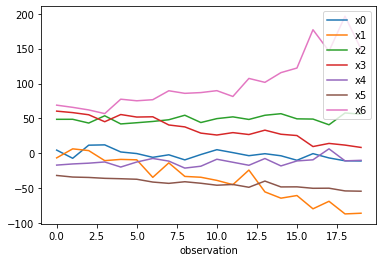

In [3]:
plt.figure()
plt.plot(X);
plt.legend(["x{}".format(i) for i in range(N)])
plt.xlabel("observation");

In [4]:
B = np.random.normal(scale=2, size=(N,M))
eigs_are_positive = False
while not eigs_are_positive:
    cov = np.random.normal(size=(M,M))
    cov = np.matmul(cov,cov.T)
    eigs_are_positive = np.all(np.linalg.eigvals(cov)>.3)
E = np.random.multivariate_normal(np.zeros(M), cov, N_obs)
Y = np.matmul(X,B)+E

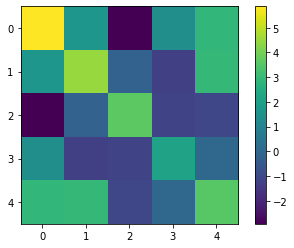

In [5]:
plt.imshow(cov)
plt.colorbar();

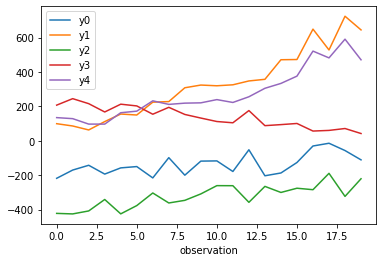

In [6]:
plt.plot(Y);
plt.legend(["y{}".format(i) for i in range(M)])
plt.xlabel("observation");

Save generated data

In [7]:
# Save data
data = np.hstack([X,Y]).T
multiindex = np.array([("x", i) for i in range(N)] + [("y", i) for i in range(M)]).T 
multiindex = pd.MultiIndex.from_arrays(multiindex, names=['category', 'number'])
df = pd.DataFrame(data, index=multiindex)
df.to_csv("multivariate_data.csv")

In [8]:
# Save real parameters used to obtain the data, useful to check if the implementation of the model is correct
data = np.vstack([B,cov])
multiindex = np.array([("b", i) for i in range(N)] + [("sigma", i) for i in range(M)]).T
multiindex = pd.MultiIndex.from_arrays(multiindex, names=['category', 'number'])
df = pd.DataFrame(data, index=multiindex)
df.to_csv("multivariate_real_params.csv")